In [1]:
import tensorflow as tf
tf.range(5)

<tf.Tensor 'range:0' shape=(5,) dtype=int32>

In [3]:
tf.linspace(0.0, 5, 11)

<tf.Tensor 'LinSpace_1:0' shape=(11,) dtype=float32>

In [4]:
tf.zeros((2,3)) #상수 텐서

<tf.Tensor 'zeros:0' shape=(2, 3) dtype=float32>

In [5]:
tf.ones((2,3))

<tf.Tensor 'ones:0' shape=(2, 3) dtype=float32>

In [6]:
tf.fill([3,3], 5) #모두 5로 채움

<tf.Tensor 'Fill:0' shape=(3, 3) dtype=int32>

In [7]:
tf.zeros_like([[3,4,5],[0,0,1]])
#2행 3열에 0이 모두 채워진채로 배열이 생성

<tf.Tensor 'zeros_like:0' shape=(2, 3) dtype=int32>

In [14]:
#tf.random.set_random_seed(777)
tf.set_random_seed(777)
tf.random.shuffle([1,2,3,4])
#tensorflow.org 사이트 참고 api 확인

<tf.Tensor 'RandomShuffle_3:0' shape=(4,) dtype=int32>

In [ ]:
# tf.reshape(x, (3,2))#x가 1차원 벡터 -> 3행2열
# tf.transpose(x) #전치행렬


In [31]:
r0=tf.reshape(tf.range(12), (3,4))
r0
sess=tf.Session()
sess.run(r0)
r1=tf.slice(r0, [0,1], [2,3])
print(sess.run(r1))
s1,s2=tf.split(r0, num_or_size_splits=2, axis=1)
print(s1)
print(s2)
print(sess.run(r0))
print(sess.run(s1))
print(sess.run(s2))

[[1 2 3]
 [5 6 7]]
Tensor("split_7:0", shape=(3, 2), dtype=int32)
Tensor("split_7:1", shape=(3, 2), dtype=int32)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 1]
 [4 5]
 [8 9]]
[[ 2  3]
 [ 6  7]
 [10 11]]


In [39]:
a=tf.range(6, dtype=tf.int32)
b=2*tf.ones(6, dtype=tf.int32)
#sess.run(a)
#sess.run(b)
print(sess.run(tf.add(a,b)))
print(sess.run(tf.subtract(a,b)))
print(sess.run(tf.multiply(a,b)))
print(sess.run(tf.divide(a,b)))

[2 3 4 5 6 7]
[-2 -1  0  1  2  3]
[ 0  2  4  6  8 10]
[0.  0.5 1.  1.5 2.  2.5]


In [40]:
print(a+b) #tf.add(a,b)

Tensor("add_5:0", shape=(6,), dtype=int32)


In [ ]:
# tf.abs()
# tf.square()
# tf.cumsum()
# tf.sqrt()
# tf.maximum, minimum()

# tf.reduce_mean():axis설정된 축 기준으로 평균
# tf.reduce_sum():
# tf.reduce_min()
# tf.reduce_max()

In [44]:
x=tf.constant([[2,0], [0,1]], dtype=tf.float32)
y=tf.constant([[1,1], [1,1]], dtype=tf.float32)
z=tf.matmul(x,y)
print(sess.run(z))
xinv=tf.linalg.inv(x) #역행렬
print(sess.run(xinv))

[[2. 2.]
 [1. 1.]]
[[0.5 0. ]
 [0.  1. ]]


In [ ]:
#tf.nn.sigmoid():로지스틱 함수

In [46]:
#회귀모델(hf=wx+b), hf 예측값, 오류:hf-ytrain

In [70]:
xtrain=[1,2,3] #입력값
ytrain=[1,2,3] #실제 결과값
b=tf.Variable(0.0)
w=tf.Variable(2.0)

hf=xtrain*w+b
cost= tf.reduce_mean(tf.square(hf-ytrain))
# opt=tf.train.GradientDescentOptimizer(0.01)
# train=opt.minimize(cost)
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

###여기까지 그래프 정의 부분###

#여기서부터 그래프 실행 부분#
sess=tf.Session() #세션생성
sess.run(tf.global_variables_initializer())#변수초기화
#트레이닝(머신러닝)
for step in range(2001):
    sess.run(train)
    if step % 20==0:
        print(step, sess.run(cost), sess.run(w))
    
    
# print("step 1: ")
# #x=1, y=1
# #-0.04*1+1.059=>1.019
# print("w=",sess.run(w),"b=",sess.run(b))
# print("cost=", sess.run(cost))

# sess.run(train)
# print("step 2: ")
# print("w=",sess.run(w),"b=",sess.run(b))
# print("cost=", sess.run(cost))

# sess.run(train)
# print("step 3: ")
# print("w=",sess.run(w),"b=",sess.run(b))
# print("cost=", sess.run(cost))
# #반복문 변경


0 3.6927404 1.9066666 -0.04
20 0.05091986 1.225077 -0.31920844
40 0.016299928 1.1536561 -0.33097196
60 0.01453234 1.1406416 -0.3179661
80 0.01319603 1.1334801 -0.3032655
100 0.011984825 1.1271546 -0.2890362
120 0.010884817 1.1211737 -0.27545485
140 0.009885769 1.1154785 -0.26250967
160 0.008978414 1.1100514 -0.2501727
180 0.008154345 1.1048795 -0.23841552
200 0.007405887 1.0999503 -0.22721079
220 0.006726151 1.0952532 -0.21653274
240 0.0061088055 1.0907767 -0.20635657
260 0.00554811 1.0865105 -0.1966586
280 0.0050388915 1.0824448 -0.18741637
300 0.00457639 1.07857 -0.17860837
320 0.004156348 1.0748775 -0.17021438
340 0.0037748616 1.0713587 -0.16221493
360 0.0034283816 1.068005 -0.15459144
380 0.0031137203 1.0648091 -0.1473262
400 0.002827934 1.0617633 -0.14040242
420 0.0025683732 1.0588604 -0.13380395
440 0.0023326322 1.0560943 -0.12751558
460 0.0021185277 1.0534581 -0.12152282
480 0.0019240867 1.0509459 -0.11581172
500 0.0017474879 1.0485516 -0.110369004
520 0.0015870914 1.0462698 -0.

In [71]:
#placeholder를 사용한 학습

In [72]:
w=tf.Variable(tf.random_normal([1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

In [74]:
x=tf.placeholder(tf.float32, shape=[None])
y=tf.placeholder(tf.float32, shape=[None])
hf=x*w+b
cost=tf.reduce_mean(tf.square(hf-y))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [79]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cv, wv, bv, _=sess.run([cost, w, b, train], feed_dict={x:[1,2,3], y:[1,2,3]})
    if step%20==0:
        print(step, cv, wv, bv)

0 13.170853 [-0.84387577] [0.82424265]
20 0.36275855 [0.30739045] [1.2538304]
40 0.22429632 [0.44131204] [1.2394985]
60 0.20275599 [0.4772208] [1.1854929]
80 0.18413751 [0.5027086] [1.1301832]
100 0.16723664 [0.5261671] [1.0771073]
120 0.15188698 [0.54844385] [1.0264909]
140 0.13794611 [0.569666] [0.97824985]
160 0.12528488 [0.5898902] [0.9322758]
180 0.11378574 [0.6091639] [0.8884623]
200 0.10334205 [0.62753177] [0.8467079]
220 0.0938569 [0.6450364] [0.80691564]
240 0.08524234 [0.66171837] [0.76899356]
260 0.077418484 [0.6776164] [0.7328537]
280 0.070312686 [0.69276726] [0.69841224]
300 0.06385911 [0.707206] [0.66558933]
320 0.057997864 [0.72096634] [0.63430905]
340 0.052674588 [0.7340799] [0.604499]
360 0.047839865 [0.74657714] [0.57608974]
380 0.043448966 [0.75848716] [0.5490156]
400 0.03946106 [0.7698373] [0.52321386]
420 0.035839126 [0.7806542] [0.49862465]
440 0.032549676 [0.79096264] [0.47519112]
460 0.029562132 [0.8007866] [0.45285887]
480 0.026848802 [0.81014884] [0.43157622]


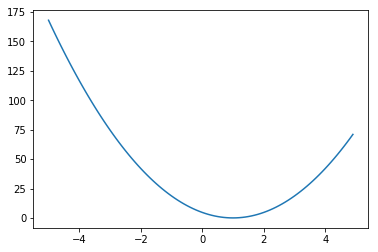

In [82]:
import matplotlib.pyplot as plt
xtrain=[1,2,3] #입력값
ytrain=[1,2,3] #실제 결과값
w=tf.placeholder(tf.float32)
hf=xtrain*w
cost= tf.reduce_mean(tf.square(hf-ytrain))
sess=tf.Session() #세션생성
sess.run(tf.global_variables_initializer())#변수초기화
wvList=[]
cvList=[]
for step in range(-50,50):
    fw=step*0.1
    cv, wv=sess.run([cost,w], feed_dict={w:fw})
    wvList.append(wv)
    cvList.append(cv)
plt.plot(wvList, cvList)
plt.show()

In [90]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
b=tf.Variable([-.3], tf.float32)
w=tf.Variable([100.], tf.float32)

hf=x*w+b
loss= tf.reduce_sum(tf.square(hf-y))
# opt=tf.train.GradientDescentOptimizer(0.01)
# train=opt.minimize(cost)
train=tf.train.GradientDescentOptimizer(1e-10).minimize(loss)
xtrain=[1,2,3,4]
ytrain=[0,-1,-2,-3]

###여기까지 그래프 정의 부분###

#여기서부터 그래프 실행 부분#
sess=tf.Session() #세션생성
sess.run(tf.global_variables_initializer())#변수초기화
#트레이닝(머신러닝)
for step in range(2001):
    sess.run(train, feed_dict={x:xtrain, y:ytrain})
    if step % 20==0:
        wv,bv,lv=sess.run([w, b, loss], feed_dict={x:xtrain, y:ytrain})
        print("w:%s b:%s loss:%s" % (wv, bv, lv))
#wv,bv,lv=sess.run([w, b, loss], feed_dict={x:xtrain, y:ytrain})

100->?

w:[100.] b:[-0.30000022] loss:303410.75
w:[100.] b:[-0.3000044] loss:303410.75
w:[100.] b:[-0.30000857] loss:303410.75
w:[100.] b:[-0.30001274] loss:303410.75
w:[100.] b:[-0.3000169] loss:303410.75
w:[100.] b:[-0.30002108] loss:303410.75
w:[100.] b:[-0.30002525] loss:303410.75
w:[100.] b:[-0.30002943] loss:303410.72
w:[100.] b:[-0.3000336] loss:303410.7
w:[100.] b:[-0.30003777] loss:303410.7
w:[100.] b:[-0.30004194] loss:303410.66
w:[100.] b:[-0.30004612] loss:303410.66
w:[100.] b:[-0.3000503] loss:303410.66
w:[100.] b:[-0.30005446] loss:303410.66
w:[100.] b:[-0.30005863] loss:303410.66
w:[100.] b:[-0.3000628] loss:303410.66
w:[100.] b:[-0.30006698] loss:303410.62
w:[100.] b:[-0.30007115] loss:303410.6
w:[100.] b:[-0.30007532] loss:303410.6
w:[100.] b:[-0.3000795] loss:303410.6
w:[100.] b:[-0.30008367] loss:303410.6
w:[100.] b:[-0.30008784] loss:303410.6
w:[100.] b:[-0.300092] loss:303410.6
w:[100.] b:[-0.30009618] loss:303410.56
w:[100.] b:[-0.30010036] loss:303410.56
w:[100.] b:[-0.3

In [99]:
xtrain=[1,2,3]
ytrain=[2,4,7]
w=tf.Variable(5.0)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [100]:
hf=x*w
cost= tf.reduce_mean(tf.square(hf-y))

In [101]:
#train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
lr=0.01
gradient=tf.reduce_mean((w*x-y)*x)
descent=w-lr*gradient
update=w.assign(descent)
#train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(20):
    sess.run(update, feed_dict={x:xtrain, y:ytrain})
    print(step, sess.run(cost, feed_dict={x:xtrain, y:ytrain}))


0 33.032196
1 30.031977
2 27.305252
3 24.827078
4 22.5748
5 20.52783
6 18.667458
7 16.976671
8 15.440003
9 14.043416
10 12.774129
11 11.620548
12 10.572125
13 9.619267
14 8.753268
15 7.966211
16 7.250899
17 6.600792
18 6.0099435
19 5.472954


In [96]:
for step in range(100):
    print(step, sess.run(w))
    sess.run(train)

0 5.0
1 4.74
2 4.5042663
3 4.290535
4 4.0967517
5 3.9210548
6 3.7617564
7 3.6173258
8 3.4863753
9 3.367647
10 3.26
11 3.1624
12 3.0739093
13 2.9936779
14 2.9209347
15 2.8549807
16 2.7951825
17 2.7409654
18 2.6918087
19 2.64724
20 2.6068308
21 2.5701933
22 2.5369751
23 2.5068574
24 2.4795506
25 2.4547925
26 2.4323452
27 2.411993
28 2.3935404
29 2.3768098
30 2.361641
31 2.3478878
32 2.3354182
33 2.3241124
34 2.3138618
35 2.304568
36 2.2961416
37 2.2885017
38 2.281575
39 2.2752945
40 2.2696004
41 2.2644377
42 2.2597568
43 2.255513
44 2.251665
45 2.2481763
46 2.2450132
47 2.2421453
48 2.239545
49 2.2371876
50 2.2350502
51 2.233112
52 2.231355
53 2.2297618
54 2.2283175
55 2.2270079
56 2.2258205
57 2.2247438
58 2.2237678
59 2.2228827
60 2.2220805
61 2.221353
62 2.2206933
63 2.2200954
64 2.2195532
65 2.2190616
66 2.2186158
67 2.2182117
68 2.2178452
69 2.217513
70 2.217212
71 2.2169387
72 2.216691
73 2.2164664
74 2.2162628
75 2.2160783
76 2.215911
77 2.2157593
78 2.2156217
79 2.215497
80 2.215

In [124]:
import numpy as np
num_points=200
vectors_set=[]
for i in range(num_points):
    x=np.random.normal(5,5)+15
    y=x*1000+np.random.normal(0,3)*1000
    vectors_set.append([x,y])
xdata=[v[0] for v in vectors_set]
ydata=[v[1] for v in vectors_set]

W0729 14:59:06.157494 12184 legend.py:1289] No handles with labels found to put in legend.


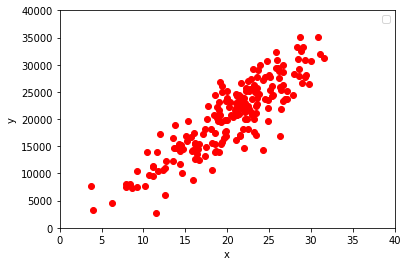

In [125]:
plt.plot(xdata,ydata,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,40])
plt.ylim([0,40000])
plt.legend()

In [126]:
w=tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b=tf.Variable(tf.zeros([1]))
y=w*xdata+b
loss=tf.reduce_mean(tf.square(y-ydata)) #0.001

In [127]:
train=tf.train.GradientDescentOptimizer(1).minimize(loss)
sess.run(tf.initialize_all_variables())

0 [900164.7] [40976.598]
0 362236070000000.0


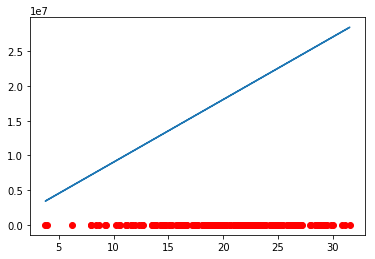

1 [-8.0315155e+08] [-36686188.]
1 2.890166e+20


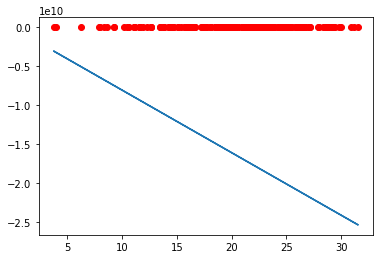

2 [7.174038e+11] [3.2769178e+10]
2 2.3059721e+26


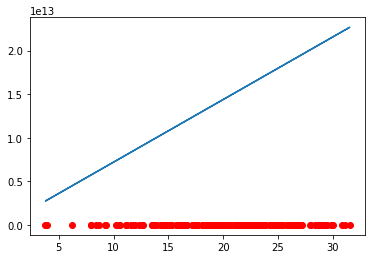

3 [-6.4081006e+14] [-2.9270571e+13]
3 1.8398625e+32


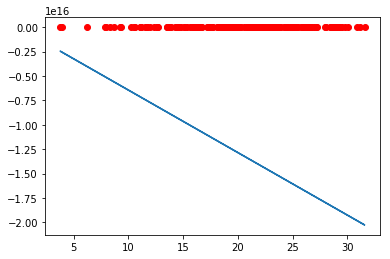

4 [5.7239373e+17] [2.6145493e+16]
4 inf


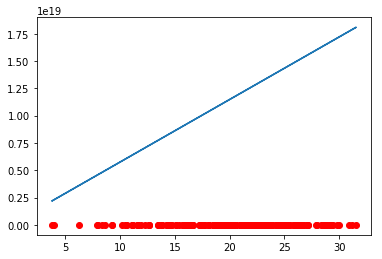

5 [-5.11282e+20] [-2.335406e+19]
5 inf


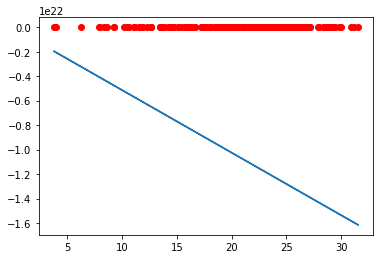

6 [4.5669483e+23] [2.086066e+22]
6 inf


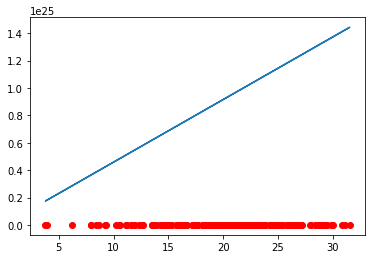

7 [-4.079357e+26] [-1.8633464e+25]
7 inf


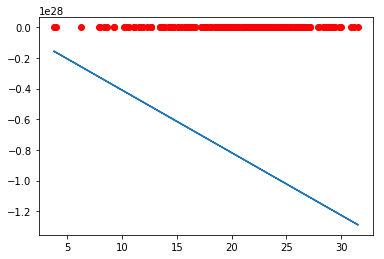

8 [3.6438233e+29] [1.6644057e+28]
8 inf


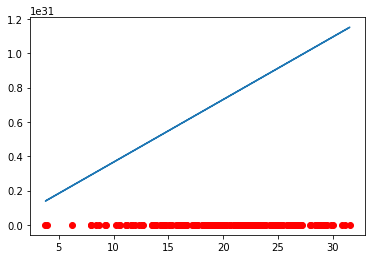

9 [-3.2547896e+32] [-1.486705e+31]
9 inf


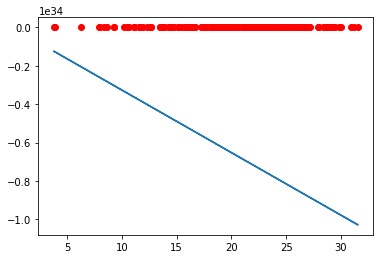

In [128]:
for step in range(10):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))
    print(step, sess.run(loss))
    plt.plot(xdata, ydata, 'ro')
    plt.plot(xdata, sess.run(w)*xdata+sess.run(b)) 
    plt.show()

In [133]:
from tensorflow import keras
#keras패키지:텐서플로우를 엔진으로 사용하는 파이썬 패키지
#신경망을 쉽게 구현
#연습용 데이터셋 제공(CIFAR10, CIFAR100,영화, 뉴스, MNIST,보스턴)
mnist=keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest)=mnist.load_data()

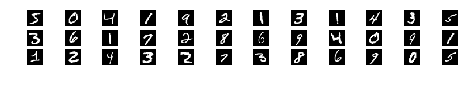

In [135]:
plt.figure(figsize=(8,1))
for i in range(36):
    plt.subplot(3,12,i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.axis("off")
plt.show()
#[5 0 4 1 9 2 1 3 1 4]

In [137]:
print(xtrain.shape)
print(ytrain.shape)#5->0000010000
print(xtest.shape)
print(ytest.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [144]:
xtrain=xtrain.reshape(60000, 28*28).astype('float32')/255.0
xtest=xtest.reshape(10000, 28*28).astype('float32')/255.0
print(xtrain.shape, xtrain.dtype)
print(xtest.shape, xtest.dtype)
print(ytrain[:10])

(60000, 784) float32
(10000, 784) float32
[5 0 4 1 9 2 1 3 1 4]


In [145]:
from tensorflow.keras.utils import to_categorical
ytrain=to_categorical(ytrain, 10)
ytest=to_categorical(ytest, 10)
ytrain[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#keras로 신경망 구성하는 순서
# 1)Sequential클래스-> 객체 생성
# 2)add메서드 -> 층(레이어)을 추가
# -입력부터 순서대로 추가
# -shape 체크
# -activation 활성화 설정
# # 2개 변수-> 4개입, 10개출 -> 10개입, 20개출 -> 20개입...
# #        2*4
# 3)compile메서드 -> 모델 생성
# -loss, optimizer(알고리즘), 성능기준설정
# 4)fit메서드 -> 트레이닝
# -에폭 설정(6만개data가 있다면 1에폭=6만개 training)
# -배치크기설정(분할 모델링, 큐러너 등 사용)

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
np.random.seed(0)
#from tensorflow.keras import *

In [149]:
model=Sequential()
model.add(Dense(15, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.1), 
              loss='mean_squared_error', 
              metrics=['accuracy'])

In [150]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
